In [2]:
from Angles_Determination import Angles_Ankle, Angles_Hip, Angles_Knee
from Processing import Change_Range,Load_Files, Plot_Data, Resample, Same_size, Set_Data, Syncronize,timeMove, Plot_Ang
from pandas import concat
import copy

c:\Users\Jose Amorocho\OneDrive\Documentos\SAM_Pyhton\Processing.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['TimeStamp'] = time
c:\Users\Jose Amorocho\OneDrive\Documentos\SAM_Pyhton\Processing.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var.iloc[drv[f]:drv[(f)+1]] = - \


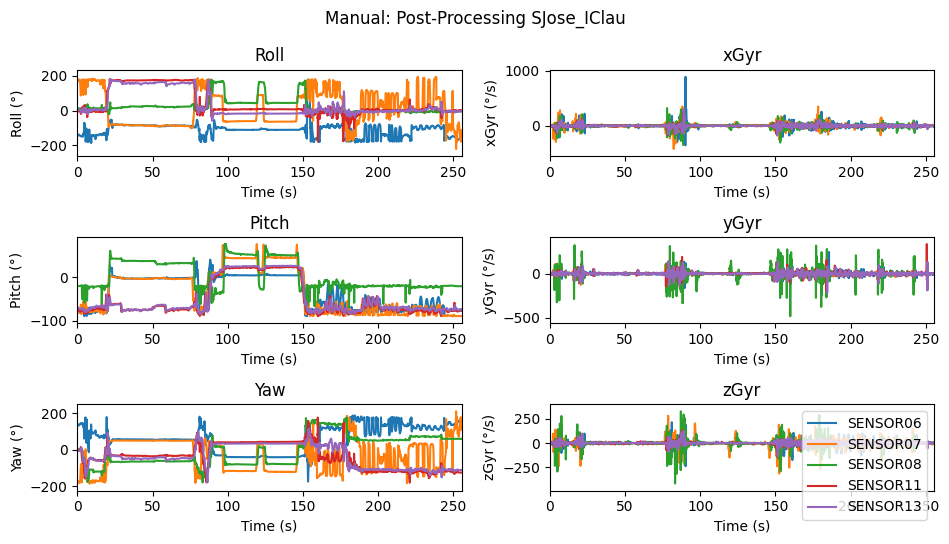

In [14]:
test= 'SJose_IClau' 
dia = 'Dia_2'
leg= 'r'
dir_r= "./2022_10_18/"+dia+'/'+test+'/'

# Load the data
data= Load_Files(dir_r)
# Set Start to 0 Sensors(SAM).
data= Set_Data(data)
# Adjust angles range to a continous angles.
data= Change_Range(data,150)
# Oversample the data to 200 Hz.
data= Resample(data,200)

#data_a = copy.deepcopy(data)
data_m = copy.deepcopy(data)
#data_a= Syncronize(data_a)

n = list(data_m.keys())
s_i= { 
    'SJose_IClau':[[-117.9,-111.385,0,-100.577,-36.335],[-14,-20,-23,-6,0]],
    'SJose_INat' :[[-117.9,-111.385,0,-100.577,-36.335],[0,-18.63,-6.595,-24.6,-22.67]],
    'SClau_IJose':[[-66, -64, -69, 0, -1.7],[-73, -69.8, -75.5, 0, -2.3]],
    'SClau_INat' :[[-76, -71, -79, 0, -2],[-72, -69, -77.5, 0, -1]]
    }
if dia == 'Dia_1': syn= s_i[test][0]
if dia == 'Dia_2': syn= s_i[test][1]
for i in range(0,len(n)):
    data_m[n[i]]= timeMove(data_m[n[i]],syn[i])
    t= data_m[n[i]]['TimeStamp']
    t= len(t.index[t<0])
    data_m[n[i]]= data_m[n[i]].iloc[t:, :]

# Resample the data to 50 Hz.
#data  = Resample(data,50)
#data_a= Resample(data_a,50)
data_m= Resample(data_m,50)
# Same size of the data.
#Same_size(data_a)
Same_size(data_m)

# Plot the data
#Plot_Data(data,test,'Pre-Processing')
#Plot_Data(data_a,test,'Auto  : Post-Processing')
Plot_Data(data_m,test,'Manual: Post-Processing')
#data['SENSOR07'].to_csv('data_2.csv')

# Find Angles
ang_hip  = Angles_Hip(data_m['SENSOR11'], data_m['SENSOR07'], leg)
ang_knee = Angles_Knee(data_m['SENSOR07'], data_m['SENSOR06'], leg)
ang_ankle= Angles_Ankle(data_m['SENSOR06'], data_m['SENSOR08'], leg)
angles= concat([data_m['SENSOR06']['TimeStamp'],ang_hip, ang_knee, ang_ankle], axis=1)
angles.to_csv(test+dia+'.csv')

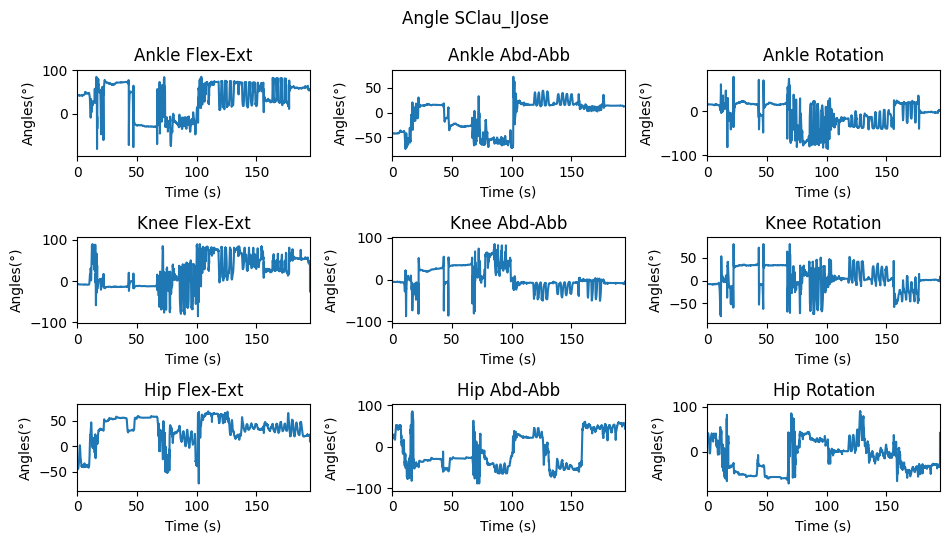

In [15]:
from matplotlib.pyplot import show, subplots

fig, ((fe1,aa1,ro1),(fe2,aa2,ro2),(fe3,aa3,ro3)) = subplots(3, 3, figsize=(9.6, 5.5))
fe1.plot(data_m['SENSOR06']['TimeStamp'], ang_ankle['Fle_Ext'])
aa1.plot(data_m['SENSOR06']['TimeStamp'], ang_ankle['Abd_Abb'])
ro1.plot(data_m['SENSOR06']['TimeStamp'], ang_ankle['Rot'])

fe2.plot(data_m['SENSOR06']['TimeStamp'], ang_knee['Fle_Ext'])
aa2.plot(data_m['SENSOR06']['TimeStamp'], ang_knee['Abd_Abb'])
ro2.plot(data_m['SENSOR06']['TimeStamp'], ang_knee['Rot'])

fe3.plot(data_m['SENSOR06']['TimeStamp'], ang_hip['Fle_Ext'])
aa3.plot(data_m['SENSOR06']['TimeStamp'], ang_hip['Abd_Abb'])
ro3.plot(data_m['SENSOR06']['TimeStamp'], ang_hip['Rot'])

fig.suptitle('Angle '+test)
fe1.set_xlabel('Time (s)')
fe1.set_ylabel('Angles(°)')
fe1.set_title('Ankle Flex-Ext')
aa1.set_xlabel('Time (s)')
aa1.set_ylabel('Angles(°)')
aa1.set_title('Ankle Abd-Abb')
ro1.set_xlabel('Time (s)')
ro1.set_ylabel('Angles(°)')
ro1.set_title('Ankle Rotation')
fe1.margins(0, 0.1)
aa1.margins(0, 0.1)
ro1.margins(0, 0.1)

fe2.set_xlabel('Time (s)')
fe2.set_ylabel('Angles(°)')
fe2.set_title('Knee Flex-Ext')
aa2.set_xlabel('Time (s)')
aa2.set_ylabel('Angles(°)')
aa2.set_title('Knee Abd-Abb')
ro2.set_xlabel('Time (s)')
ro2.set_ylabel('Angles(°)')
ro2.set_title('Knee Rotation')
fe2.margins(0, 0.1)
aa2.margins(0, 0.1)
ro2.margins(0, 0.1)

fe3.set_xlabel('Time (s)')
fe3.set_ylabel('Angles(°)')
fe3.set_title('Hip Flex-Ext')
aa3.set_xlabel('Time (s)')
aa3.set_ylabel('Angles(°)')
aa3.set_title('Hip Abd-Abb')
ro3.set_xlabel('Time (s)')
ro3.set_ylabel('Angles(°)')
ro3.set_title('Hip Rotation')
fe3.margins(0, 0.1)
aa3.margins(0, 0.1)
ro3.margins(0, 0.1)

fig.tight_layout()
show()